In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Show first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Survival Count

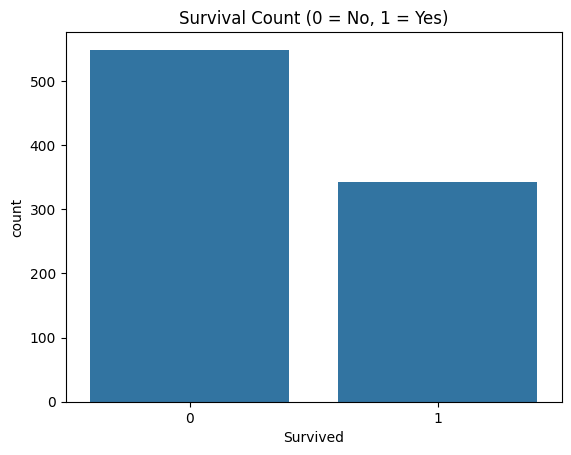

In [2]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()


2. Age Distribution

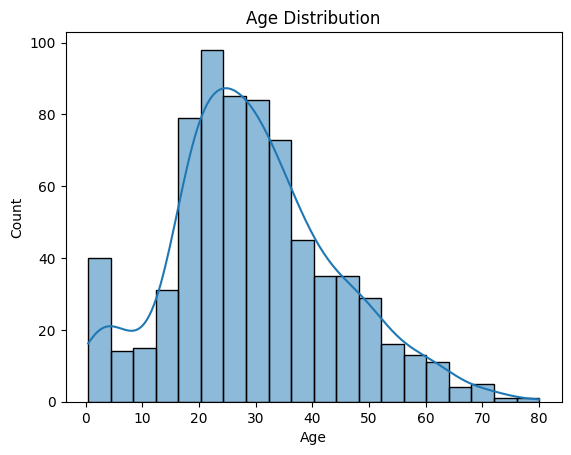

In [3]:
sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

3. Box Plot of Fare by Class

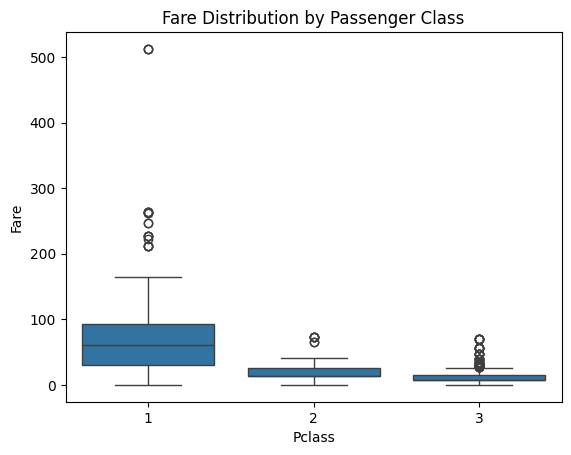

In [4]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Passenger Class")
plt.show()

4. Heatmap of Correlations

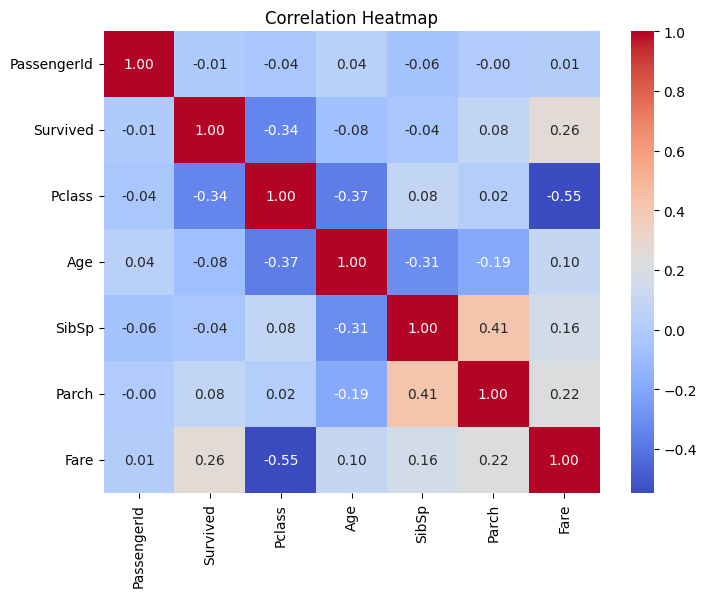

In [6]:
plt.figure(figsize=(8,6))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Plot heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


5.Line Chart: Age vs Number of Deaths (Male vs Female)

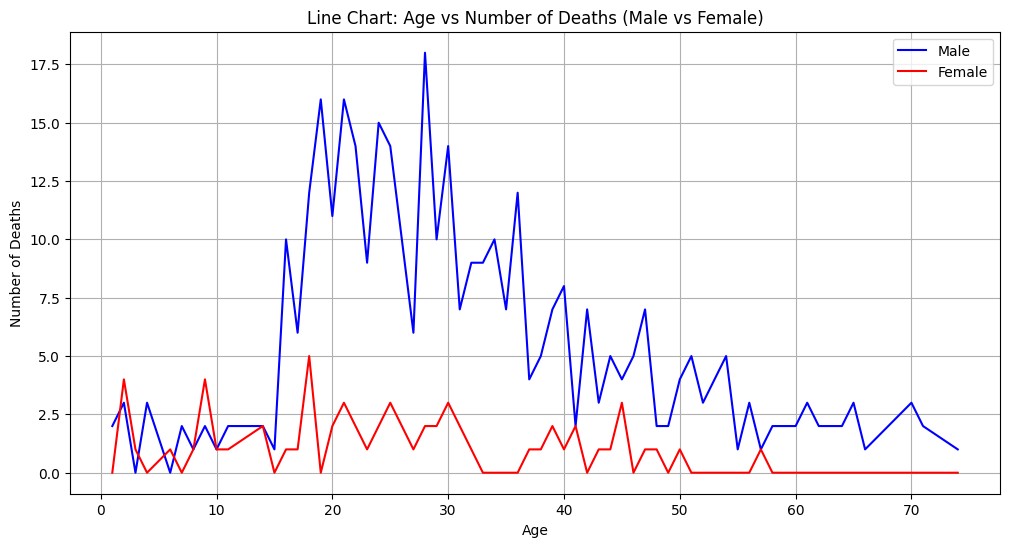

In [10]:
# Filter only deaths
deaths = df[df['Survived'] == 0]

# Remove rows with missing age
deaths = deaths.dropna(subset=['Age'])

# Round age to group better (optional)
deaths['Age'] = deaths['Age'].round()

# Group by Age and Sex, and count
death_counts = deaths.groupby(['Age', 'Sex']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(death_counts.index, death_counts['male'], label='Male', color='blue')
plt.plot(death_counts.index, death_counts['female'], label='Female', color='red')
plt.title("Line Chart: Age vs Number of Deaths (Male vs Female)")
plt.xlabel("Age")
plt.ylabel("Number of Deaths")
plt.legend()
plt.grid(True)
plt.show()

6.Pie Chart – Gender Distribution

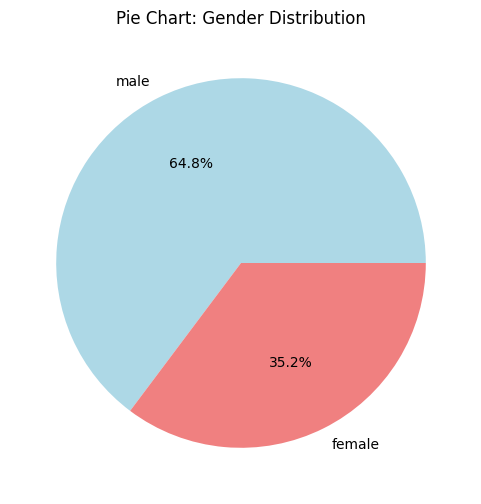

In [8]:
# Count gender
gender_counts = df['Sex'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Pie Chart: Gender Distribution")
plt.show()

7.Scatter Plot – Age vs Fare (colored by survival)

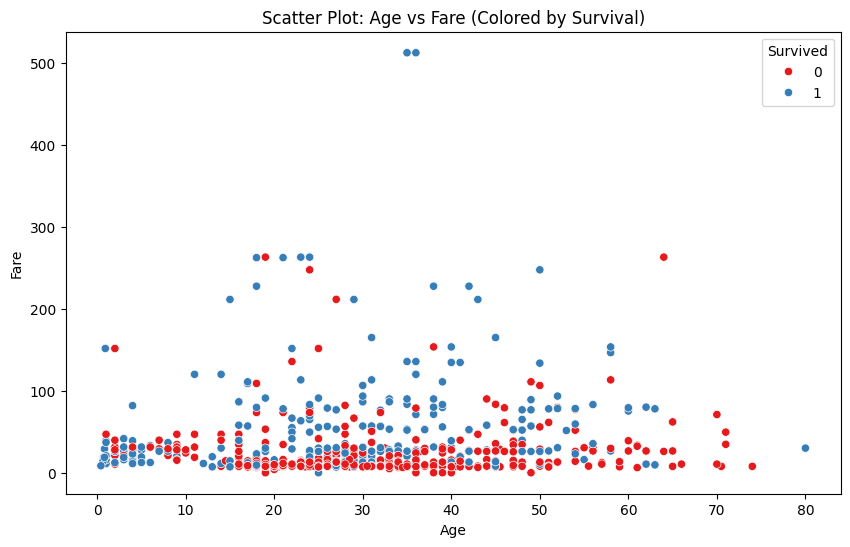

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='Set1')
plt.title("Scatter Plot: Age vs Fare (Colored by Survival)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()